In [1]:
fsize = (16,3)
fsize2 = (16,5)
list_colors = ['darkblue','orange','green','purple']
post = 'sales'
top_feats = 20
list_prop = ['Unit', 'Land', 'Building']

## Exploratory Data Analysis

In [2]:
# read
df = pd.read_pickle('data1.pkl')
feats = [
    'Property Type',
    'dt_month',
    'dt_year',
    'Amount',
    'Property Size (sq.m)',
]
df['cnt'] = 1
print(df.shape)
df[:3]

(483458, 42)


,Transaction Number,Transaction Date,Property ID,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,Property Sub Type,Amount,Transaction Size (sq.m),Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Master Project,Project,dt_month,dt_year,tr_year_num,tr_month_num,Property ID_last,Property Type_lbl,Property Sub Type_lbl,Area_lbl,Nearest Metro_lbl,Nearest Mall_lbl,Nearest Landmark_lbl,Project_lbl,Property Sub Type_trg,Area_trg,Nearest Metro_trg,Nearest Mall_trg,Nearest Landmark_trg,Project_trg,cnt
0,11-1-2012,2012-01-02 08:16:00,236028,Sales,Sale,1,0,0,al suq al kabeer,Land,Land_Commercial,"2,400,000.00",201.79,201.79,NaN,0,Al Ghubaiba Metro Station,Dubai Mall,Burj Khalifa,1.00,1.00,NaN,,2012-01-01,2012,2012,1,NaN,1,6,31,6,2,3,0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,11-2-2012,2012-01-02 08:22:00,90111,Sales,Sale,1,0,1,mirdif,Land,Land_Residential,"2,784,375.00",940.64,940.64,NaN,0,Rashidiya Metro Station,City Centre Mirdif,Dubai International Airport,1.00,1.00,NaN,,2012-01-01,2012,2012,1,NaN,1,12,116,43,1,6,0,NaN,NaN,NaN,NaN,NaN,NaN,1
2,41-8804-2010,2012-01-02 08:35:00,738093,Sales,Delayed Sell,1,1,1,palm jumeirah,Unit,Unit_Flat,"2,662,200.00",190.05,190.05,2.00,1,Palm Jumeirah,Marina Mall,Burj Al Arab,1.00,1.00,NaN,marina residence,2012-01-01,2012,2012,1,NaN,2,18,126,42,5,2,522,NaN,NaN,NaN,NaN,NaN,NaN,1


,Amount,cnt,amt_mean
dt_month,,,
2012-01-01,"5,583,397,938.37",2805,"6,470.31"
2012-02-01,"5,521,931,786.98",2895,"5,810.52"
2012-03-01,"5,022,495,870.14",2721,"4,515.18"


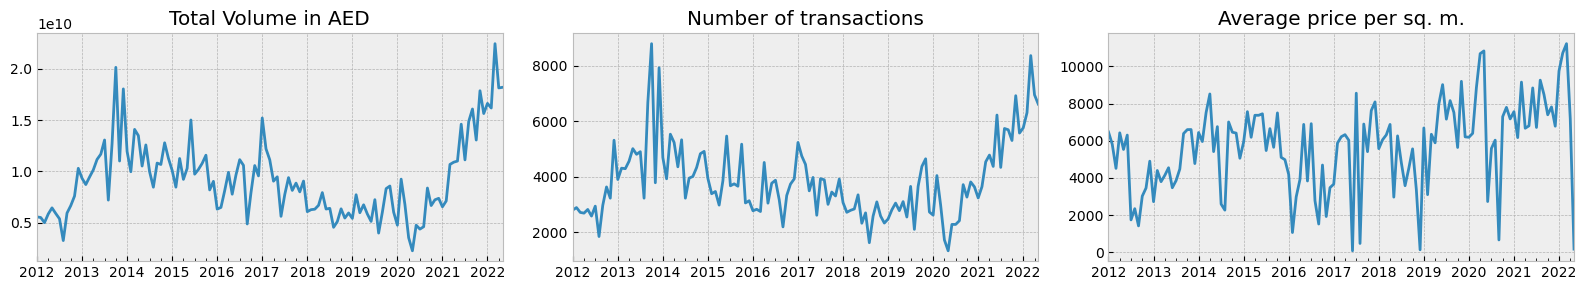

In [3]:
# plot
list_ttl = [
    'Total Volume in AED',
    'Number of transactions',
    'Average price per sq. m.'
]

feats_gr = [
    # 'Property Type',
    'dt_month',
    # 'dt_year',
    # 'Amount',
    # 'Property Size (sq.m)',
]

feats_ag = [
    # 'Property Type',
    # 'dt_month',
    # 'dt_year',
    'Amount',
    'cnt',
    'Property Size (sq.m)',
]

df1 = df.groupby(feats_gr)[feats_ag].sum()
df1['amt_mean'] = df1['Amount'] / df1['Property Size (sq.m)']
del df1['Property Size (sq.m)']
display(df1[:3])


_, ax = plt.subplots(1,3,figsize = fsize)
feats = df1.columns
for i,f in enumerate(feats):
    df1[f].plot(kind = 'line', ax = ax[i], title = list_ttl[i], xlabel = '')
plt.tight_layout()
plt.savefig(f'imgs/eda_{post}1.png')
plt.show()

,Amount,cnt,amt_mean
Property Type,,,
Building,"92,992,600,886.96",42627,"7,625.52"
Land,"547,308,494,081.26",82344,"1,341.08"
Unit,"515,829,663,565.08",358487,"14,153.18"


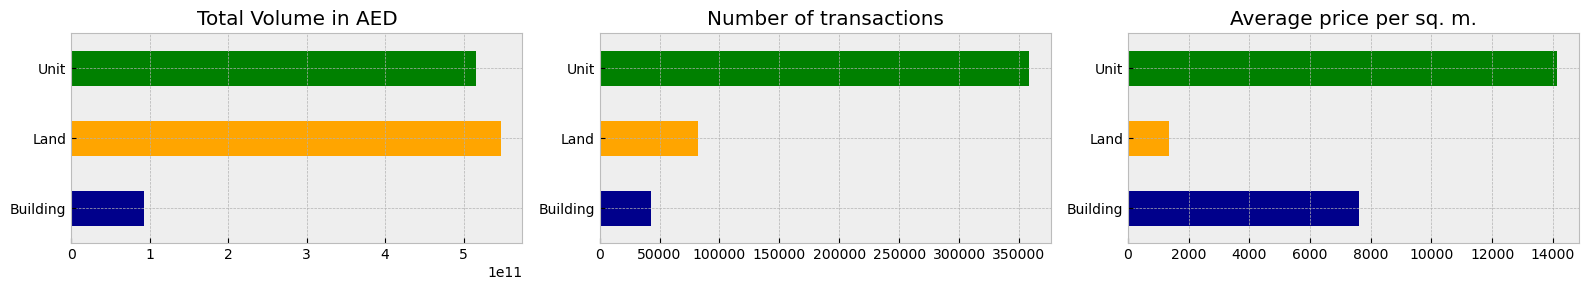

In [4]:
# plot
list_ttl = [
    'Total Volume in AED',
    'Number of transactions',
    'Average price per sq. m.'
]

feats_gr = [
    'Property Type',
    # 'dt_month',
    # 'dt_year',
    # 'Amount',
    # 'Property Size (sq.m)',
]

feats_ag = [
    # 'Property Type',
    # 'dt_month',
    # 'dt_year',
    'Amount',
    'cnt',
    'Property Size (sq.m)',
]

df1 = df.groupby(feats_gr)[feats_ag].sum()
df1['amt_mean'] = df1['Amount'] / df1['Property Size (sq.m)']
del df1['Property Size (sq.m)']
display(df1[:3])


_, ax = plt.subplots(1,3,figsize = fsize)
feats = df1.columns
for i,f in enumerate(feats):
    df1[f].plot(kind = 'barh', ax = ax[i], title = list_ttl[i], ylabel = '', color = list_colors[:3])
plt.tight_layout()
plt.savefig(f'imgs/eda_{post}2.png')
plt.show()

Amount  cnt  amt_mean
Property Type dt_month                                
Building      2012-01-01 141,970,126.00   79  6,775.77
              2012-02-01 444,136,294.96  142  2,362.50
              2012-03-01 233,127,052.00   96  7,357.27

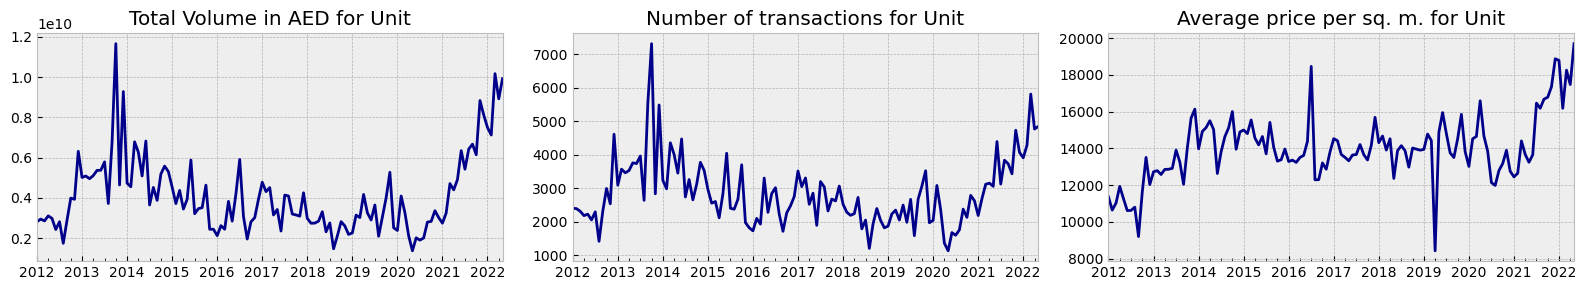

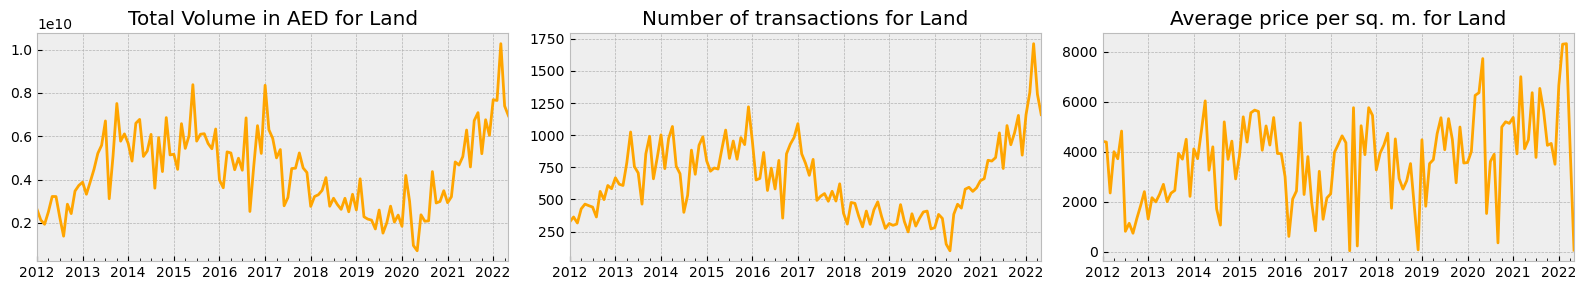

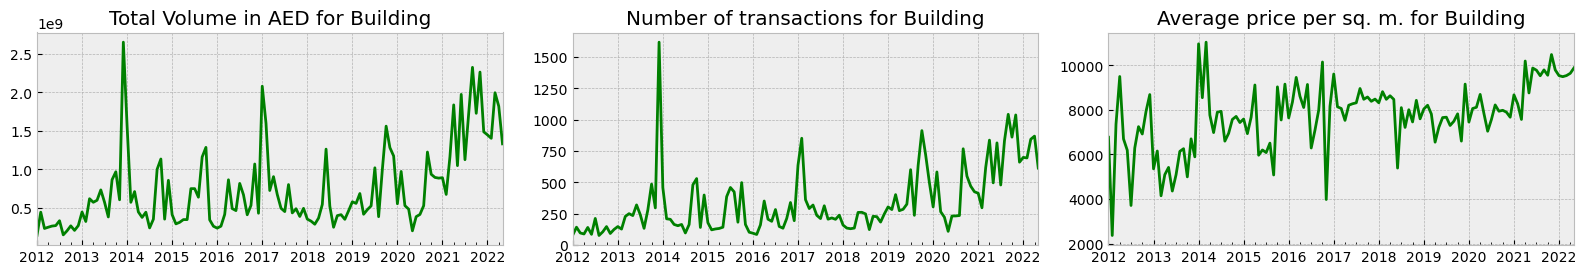

In [5]:
# plot
list_ttl = [
    'Total Volume in AED',
    'Number of transactions',
    'Average price per sq. m.'
]

feats_gr = [
    'Property Type',
    'dt_month',
    # 'dt_year',
    # 'Amount',
    # 'Property Size (sq.m)',
]

feats_ag = [
    # 'Property Type',
    # 'dt_month',
    # 'dt_year',
    'Amount',
    'cnt',
    'Property Size (sq.m)',
]

df1 = df.groupby(feats_gr)[feats_ag].sum()
df1['amt_mean'] = df1['Amount'] / df1['Property Size (sq.m)']
del df1['Property Size (sq.m)']
display(df1[:3])

feats = df1.columns
for j,k in enumerate(list_prop):
    _, ax = plt.subplots(1,3,figsize = fsize)
    for i,f in enumerate(feats):
        df1.loc[k][f].plot(kind = 'line', ax = ax[i], title = list_ttl[i] + f' for {k}', xlabel = '', color = list_colors[j])
    plt.tight_layout()
    plt.savefig(f'imgs/eda_{post}3{j}.png')
    plt.show()

## Correlation Analysis

In [6]:
# Merge with additional dataset
df = pd.read_pickle('data0.pkl')

df2 = df1.unstack(level = 0)['Amount']
feats = list(df2.columns)

df = df.merge(df2.reset_index()).set_index('dt_month')

print(df.shape)
df[:3]

(125, 501)


,CPI_ALL,CPI_COM,CPI_EDU,CPI_FNB,CPI_FUR,CPI_HOU,CPI_INS,CPI_MED,CPI_MIS,CPI_REC,CPI_RES,CPI_TEX,CPI_TOB,CPI_TRN,CPI_ALL_diff1,CPI_ALL_diff12,CPI_COM_diff1,CPI_COM_diff12,CPI_EDU_diff1,CPI_EDU_diff12,CPI_FNB_diff1,CPI_FNB_diff12,CPI_FUR_diff1,CPI_FUR_diff12,CPI_HOU_diff1,CPI_HOU_diff12,CPI_INS_diff1,CPI_INS_diff12,CPI_MED_diff1,CPI_MED_diff12,CPI_MIS_diff1,CPI_MIS_diff12,CPI_REC_diff1,CPI_REC_diff12,CPI_RES_diff1,CPI_RES_diff12,CPI_TEX_diff1,CPI_TEX_diff12,CPI_TOB_diff1,CPI_TOB_diff12,CPI_TRN_diff1,CPI_TRN_diff12,CURR_Close,GDP_ACC,GDP_ACT,GDP_AGR,GDP_ART,GDP_CON,GDP_EDU,GDP_ELE,GDP_FIN,GDP_HUM,GDP_INF,GDP_MAN,GDP_MIN,GDP_NFC,GDP_PRO,GDP_PUB,GDP_REA,GDP_TOT_GDP,GDP_TOT_NO,GDP_TRA,GDP_WHO,GDP_ACC_pct12,GDP_ACT_pct12,GDP_AGR_pct12,GDP_ART_pct12,GDP_CON_pct12,GDP_EDU_pct12,GDP_ELE_pct12,GDP_FIN_pct12,GDP_HUM_pct12,GDP_INF_pct12,GDP_MAN_pct12,GDP_MIN_pct12,...,WB_EN.GHG.CO2.ZG.AR5,WB_EN.GHG.CO2.RT.GDP.KD,WB_EN.GHG.CO2.BU.MT.CE.AR5,WB_EN.GHG.CH4.TR.MT.CE.AR5,WB_EN.GHG.CH4.IC.MT.CE.AR5,WB_EN.GHG.ALL.PC.CE.AR5,WB_EG.ELC.ACCS.ZS,WB_EG.CFT.ACCS.ZS,WB_CC.PER.RNK,WB_BX.KLT.DINV.WD.GD.ZS,WB_AG.PRD.CREL.MT,WB_VA.PER.RNK,WB_TX.VAL.MANF.ZS.UN,WB_TX.VAL.FOOD.ZS.UN,WB_TM.VAL.MMTL.ZS.UN,WB_TM.VAL.FUEL.ZS.UN,WB_SP.RUR.TOTL.ZS,WB_SP.POP.TOTL.FE.IN,WB_SP.POP.GROW,WB_SP.POP.BRTH.MF,WB_SP.POP.7579.FE.5Y,WB_SP.POP.65UP.TO,WB_SP.POP.65UP.FE.IN,WB_SP.POP.6064.FE.5Y,WB_SP.POP.5054.FE.5Y,WB_SP.POP.4044.FE.5Y,WB_SP.POP.3034.FE.5Y,WB_SP.POP.2024.FE.5Y,WB_SP.POP.1564.MA.IN,WB_SP.POP.1519.FE.5Y,WB_SP.POP.0509.FE.5Y,WB_SP.POP.0014.MA.IN,WB_SP.POP.0004.FE.5Y,WB_SP.DYN.TFRT.IN,WB_SP.DYN.IMRT.MA.IN,WB_SP.DYN.AMRT.FE,WB_SH.STA.SMSS.ZS,WB_SH.STA.ODFC.ZS,WB_SH.STA.BASS.ZS,WB_SH.IMM.HEPB,WB_SH.H2O.BASW.ZS,WB_SH.DYN.NMRT,WB_SH.DYN.MORT.MA,WB_SH.DYN.AIDS.FE.ZS,WB_SH.DYN.0509,WB_SH.DTH.1519,WB_SG.LAW.INDX,WB_SE.SEC.AGES,WB_SE.COM.DURS,WB_EN.GHG.CO2.IP.MT.CE.AR5,WB_EN.GHG.CH4.PI.MT.CE.AR5,WB_EN.GHG.CH4.FE.MT.CE.AR5,WB_EN.GHG.ALL.MT.CE.AR5,WB_EG.ELC.ACCS.UR.ZS,WB_EG.CFT.ACCS.UR.ZS,WB_GE.PER.RNK,WB_FP.CPI.TOTL.ZG,WB_FM.LBL.BMNY.GD.ZS,WB_FM.AST.NFRG.CN,WB_FI.RES.XGLD.CD,WB_FD.RES.LIQU.AS.ZS,WB_FB.CBK.BRCH.P5,WB_ER.FSH.PROD.MT,WB_EN.URB.MCTY,WB_EN.GHG.N2O.WA.MT.CE.AR5,WB_EN.GHG.N2O.IP.MT.CE.AR5,WB_EN.GHG.N2O.AG.MT.CE.AR5,WB_EN.GHG.CO2.TR.MT.CE.AR5,WB_EN.GHG.CO2.PC.CE.AR5,WB_EN.GHG.CO2.IC.MT.CE.AR5,WB_EN.GHG.CH4.ZG.AR5,WB_EN.GHG.CH4.MT.CE.AR5,Building,Land,Unit
dt_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-01,96.75,99.49,89.21,93.85,95.83,98.08,NaN,98.53,96.49,98.13,94.99,100.61,82.28,97.62,0.29,0.70,-0.01,-0.20,0.00,3.25,-0.61,6.94,0.51,3.90,0.72,-3.77,NaN,NaN,0.05,0.23,-0.15,2.29,-0.09,-0.19,0.00,1.97,1.57,5.34,0.00,3.45,0.06,-0.02,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.78,0.57,0.67,0.10,0.04,27.15,100.00,100.00,81.04,1.98,"4,590.17",23.47,4.12,1.33,2.55,1.33,15.58,"2,364,604.00",1.10,1.04,0.06,"21,243.00","11,872.00",0.33,1.29,4.44,14.57,15.75,"5,545,879.00",9.87,6.84,"655,351.00",9.72,1.72,7.60,57.12,98.44,0.00,99.12,95.00,99.83,3.40,9.50,25.22,1.00,326.00,26.88,11.00,6.00,15.71,0.10,36.49,232.82,100.00,100.00,81.99,0.88,61.36,"89,865,335,178.11","37,269,318,422.58",13.16,12.27,"75,562.00","3,898,904.00",0.13,1.03,0.37,30.08,20.66,66.29,68.34,44.78,"141,970,126.00","2,623,319,676.58","2,818,108,135.79"
2012-02-01,96.32,99.44,89.21,93.50,94.92,97.38,NaN,99.11,97.17,98.04,94.67,99.65,82.18,97.31,-0.43,0.53,-0.05,1.26,0.00,3.25,-0.35,6.53,-0.91,3.88,-0.70,-3.84,NaN,NaN,0.58,0.85,0.68,2.14,-0.09,-0.60,-0.32,1.55,-0.96,4.03,-0.10,3.35,-0.31,-0.40,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,213.06,0.57,0.66,0.10,0.04,27.23,100.00,100.00,81.20,2.02,"4,522.57",23.04,4.23,1.34,2.59,1.49,15.55,"2,369,269.83",1.09,1.04,0.07,"21,863.50","12,227.42",0.33,1.31,4.49,14.60,15

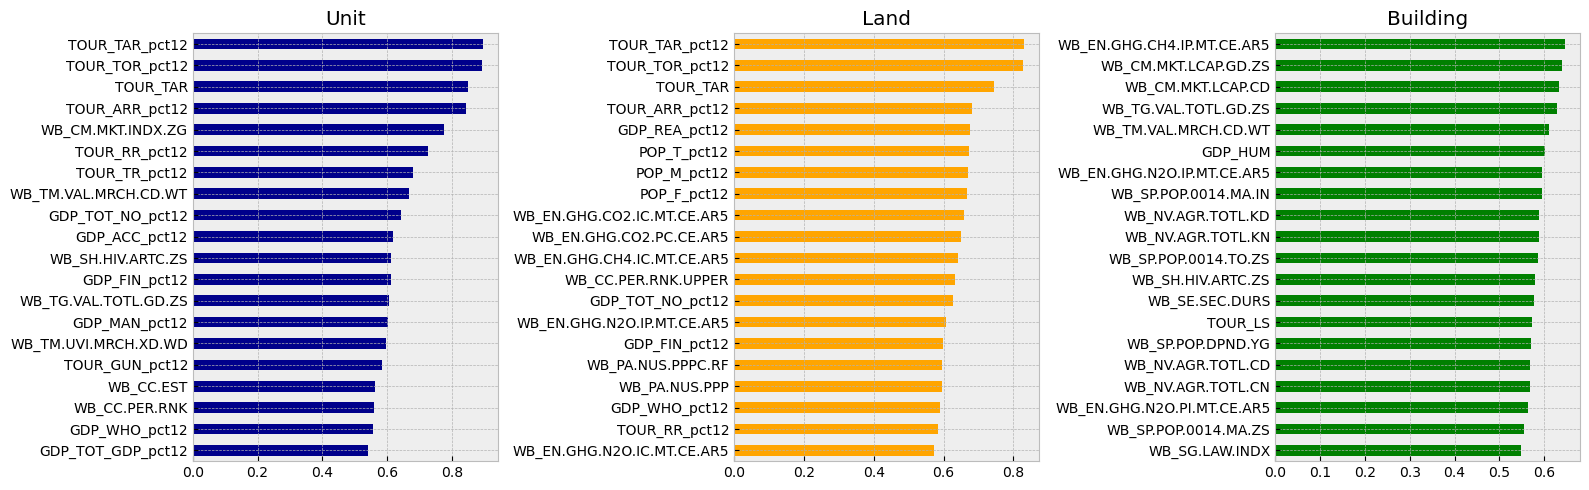

In [7]:
# TOP Features by correlation with
df_corr = df.corr()

dict_feats = {}

_, ax = plt.subplots(1,3,figsize = fsize2)
for i,f in enumerate(list_prop):
    df1 = df_corr[f]
    df1 = df1[~df1.index.isin(feats)].sort_values(ascending = False)
    df1[:top_feats][::-1].plot(kind = 'barh', ax = ax[i], color = list_colors[i], title = f'{f}')
    dict_feats[f] = list(df1.index)
plt.tight_layout()
plt.savefig(f'imgs/eda_{post}_corr.png')
plt.show()

pd.Series(dict_feats).to_pickle(f'dict_{post}.pkl')

## Target Analysis

In [8]:
# stat1
df = pd.read_pickle('data1.pkl')

pd.options.display.float_format = '{:,.0f}'.format
list_per = [0.002,0.998]
df_descr1 = df.groupby(['Property Type']).Amount.describe(percentiles = list_per)


# log amount
df['Amount_log'] = df['Amount'].map(np.log1p)

df_descr = df.groupby(['Property Type']).Amount_log.describe(percentiles = list_per)

df_descr['mean-3std'] = df_descr['mean'] - 3*df_descr['std']
df_descr['mean+3std'] = df_descr['mean'] + 3*df_descr['std']

df_descr['mean-3std'] = df_descr['mean-3std'].map(np.expm1)
df_descr['mean+3std'] = df_descr['mean+3std'].map(np.expm1)

# manual clip
dict_clip = {
    'Building': [100_000, 10_000_000],
    'Land':     [100_000, 100_000_000],
    'Unit':     [100_000, 10_000_000],    
}
df_descr['lower'] = 1.*df_descr.index.map(lambda x: dict_clip[x][0])
df_descr['upper'] = 1.*df_descr.index.map(lambda x: dict_clip[x][1])

dict_clip2 = {}
for k,v in dict_clip.items():
    f1 = df['Property Type'] == k
    y = df[f1].Amount
    dict_clip2[k] = [y[y < v[0]].shape[0], y[y > v[1]].shape[0]]
df_descr['lower_cnt'] = 1.*df_descr.index.map(lambda x: dict_clip2[x][0])
df_descr['upper_cnt'] = 1.*df_descr.index.map(lambda x: dict_clip2[x][1])

df_descr = pd.concat([df_descr1, df_descr.iloc[:,-6:]] ,axis = 1)

fout = open(f'imgs/trg_{post}1.html','w')
fout.write(df_descr.T.to_html())
fout.close()
df_descr

,count,mean,std,min,0.2%,50%,99.8%,max,mean-3std,mean+3std,lower,upper,lower_cnt,upper_cnt
Property Type,,,,,,,,,,,,,,
Building,"42,627","2,181,542","5,579,646",400,"319,137","1,750,888","20,000,000","750,000,000","451,691","7,661,078","100,000","10,000,000",39,198
Land,"82,344","6,646,610","20,978,677",251,"10,825","3,050,000","189,030,695","1,125,000,000","100,292","96,384,734","100,000","100,000,000","1,028",447
Unit,"358,487","1,438,908","2,473,631",68,"99,508","977,299","17,800,025","575,000,000","96,423","10,644,605","100,000","10,000,000",718,"2,145"


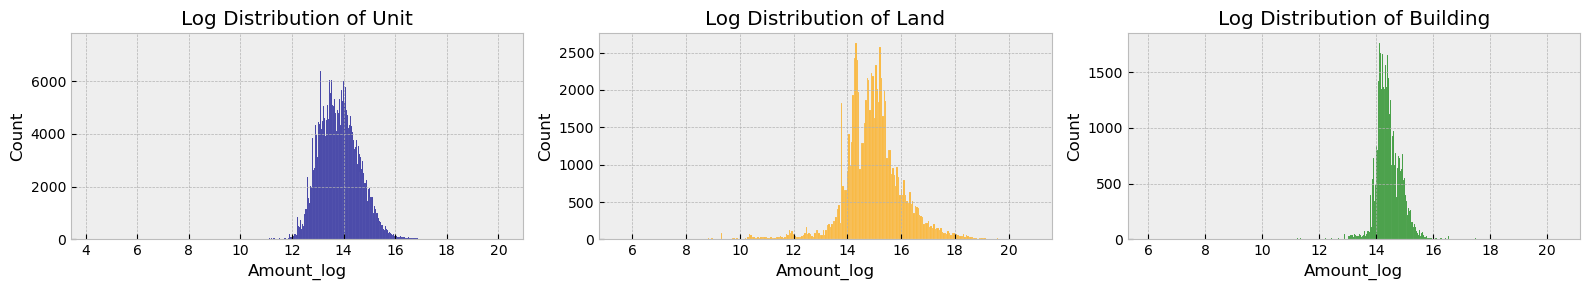

In [9]:
# plot1
_, ax = plt.subplots(1,len(list_prop), figsize = (16,3))
for i,f in enumerate(list_prop):
    f1 = df['Property Type'] == f
    sns.histplot(df[f1].Amount_log, ax = ax[i], color = list_colors[i])
    ax[i].set_title(f'Log Distribution of {f}')

plt.tight_layout()
plt.savefig(f'imgs/trg_{post}1.png')
plt.show()